# 자유로운 EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Load Data 

In [5]:
data = pd.read_csv(r'C:\Users\soug9\Desktop\occupancy_data\01_original\datatraining.txt')

In [100]:
data.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [101]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [15]:
data.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.180,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.150,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.150,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.150,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.100,27.2000,426.0,704.500000,0.004757,1
6,2015-02-04 17:55:59,23.100,27.2000,419.0,701.000000,0.004757,1
7,2015-02-04 17:57:00,23.100,27.2000,419.0,701.666667,0.004757,1
8,2015-02-04 17:57:59,23.100,27.2000,419.0,699.000000,0.004757,1
9,2015-02-04 17:58:59,23.100,27.2000,419.0,689.333333,0.004757,1
10,2015-02-04 18:00:00,23.075,27.1750,419.0,688.000000,0.004745,1


## EDA 

* date

In [6]:
data['datetime'] = pd.to_datetime(data['date'])

In [17]:
data['datetime'].dt.day.value_counts().sort_index()

4      369
5     1440
6     1440
7     1440
8     1440
9     1440
10     574
Name: datetime, dtype: int64

In [18]:
data['datetime'][data['datetime'].dt.day == 4].dt.hour.value_counts().sort_index()

17     9
18    60
19    61
20    59
21    60
22    61
23    59
Name: datetime, dtype: int64

In [19]:
data['datetime'][data['datetime'].dt.day == 10].dt.hour.value_counts().sort_index()

0    60
1    61
2    59
3    60
4    61
5    59
6    60
7    61
8    59
9    34
Name: datetime, dtype: int64

In [7]:
data = data.sort_values('datetime')

In [105]:
data.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,datetime
1,2015-02-04 17:51:00,23.180,27.2720,426.0,721.250000,0.004793,1,2015-02-04 17:51:00
2,2015-02-04 17:51:59,23.150,27.2675,429.5,714.000000,0.004783,1,2015-02-04 17:51:59
3,2015-02-04 17:53:00,23.150,27.2450,426.0,713.500000,0.004779,1,2015-02-04 17:53:00
4,2015-02-04 17:54:00,23.150,27.2000,426.0,708.250000,0.004772,1,2015-02-04 17:54:00
5,2015-02-04 17:55:00,23.100,27.2000,426.0,704.500000,0.004757,1,2015-02-04 17:55:00
6,2015-02-04 17:55:59,23.100,27.2000,419.0,701.000000,0.004757,1,2015-02-04 17:55:59
7,2015-02-04 17:57:00,23.100,27.2000,419.0,701.666667,0.004757,1,2015-02-04 17:57:00
8,2015-02-04 17:57:59,23.100,27.2000,419.0,699.000000,0.004757,1,2015-02-04 17:57:59
9,2015-02-04 17:58:59,23.100,27.2000,419.0,689.333333,0.004757,1,2015-02-04 17:58:59
10,2015-02-04 18:00:00,23.075,27.1750,419.0,688.000000,0.004745,1,2015-02-04 18:00:00


* Temperature

In [24]:
# Temperature
data['Temperature'].describe()

count    8143.000000
mean       20.619084
std         1.016916
min        19.000000
25%        19.700000
50%        20.390000
75%        21.390000
max        23.180000
Name: Temperature, dtype: float64

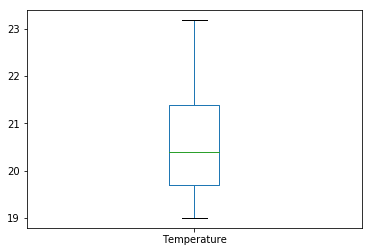

In [25]:
data['Temperature'].plot.box() 

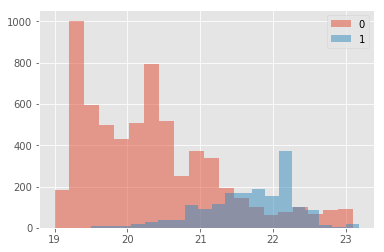

In [13]:
plt.style.use('ggplot')
plt.hist(data['Temperature'][data['Occupancy']==0], bins=20, alpha=0.5, label='0')
plt.hist(data['Temperature'][data['Occupancy']==1], bins=20, alpha=0.5, label='1')
plt.legend()

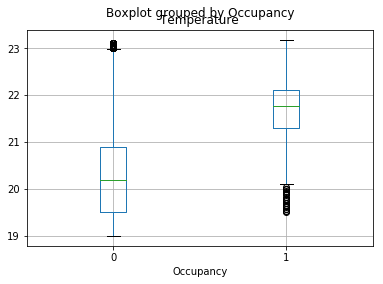

In [27]:
data.boxplot(column='Temperature', by='Occupancy')

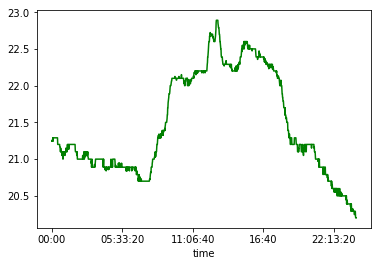

In [30]:
plt.plot(data['datetime'].dt.time[data['datetime'].dt.day == 5], data['Temperature'][data['datetime'].dt.day == 5], color = 'g')

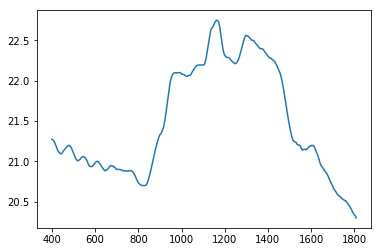

In [34]:
ma = data['Temperature'][data['datetime'].dt.day == 5].rolling(window=30).mean()
plt.plot(ma)

In [2]:
def trend(feature, day) :
    d = data[data['datetime'].dt.day == day]
    d.index = d['datetime'].dt.time

    ma = d[feature].rolling(window=30).mean()
    plt.plot(ma)
    
    return None

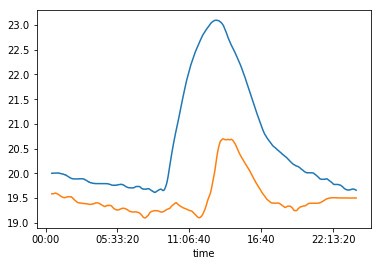

In [48]:
# 주말
trend('Temperature', 7)
trend('Temperature', 8)

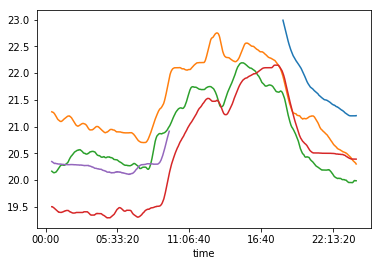

In [49]:
# 주중
trend('Temperature', 4)
trend('Temperature', 5)
trend('Temperature', 6)
trend('Temperature', 9)
trend('Temperature', 10)

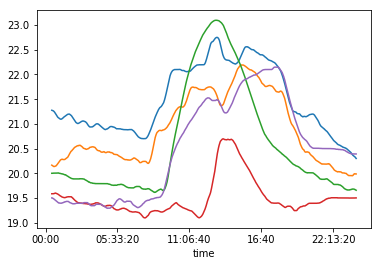

In [15]:
trend('Temperature', 5)
trend('Temperature', 6)
trend('Temperature', 7)
trend('Temperature', 8)
trend('Temperature', 9)

* Humidity

In [50]:
data['Humidity'].describe()

count    8143.000000
mean       25.731507
std         5.531211
min        16.745000
25%        20.200000
50%        26.222500
75%        30.533333
max        39.117500
Name: Humidity, dtype: float64

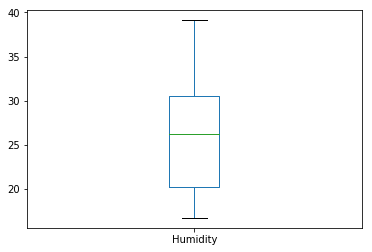

In [51]:
data['Humidity'].plot.box() 

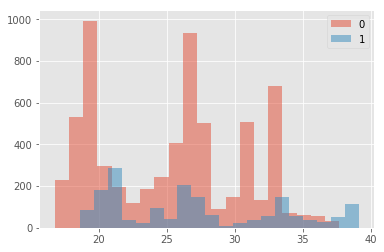

In [8]:
plt.style.use('ggplot')
plt.hist(data['Humidity'][data['Occupancy']==0], bins=20, alpha=0.5, label='0')
plt.hist(data['Humidity'][data['Occupancy']==1], bins=20, alpha=0.5, label='1')
plt.legend()

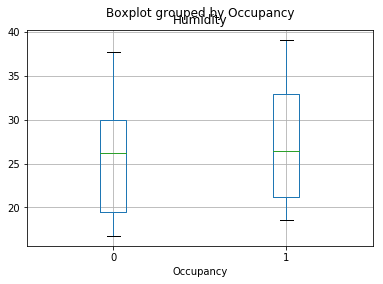

In [53]:
data.boxplot(column='Humidity', by='Occupancy')

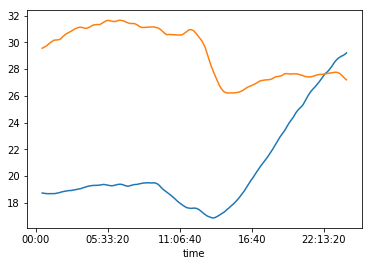

In [54]:
# 주말
trend('Humidity', 7)
trend('Humidity', 8)

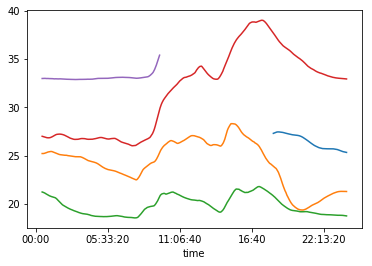

In [55]:
# 주중
trend('Humidity', 4)
trend('Humidity', 5)
trend('Humidity', 6)
trend('Humidity', 9)
trend('Humidity', 10)

* Light

In [56]:
data['Light'].describe()

count    8143.000000
mean      119.519375
std       194.755805
min         0.000000
25%         0.000000
50%         0.000000
75%       256.375000
max      1546.333333
Name: Light, dtype: float64

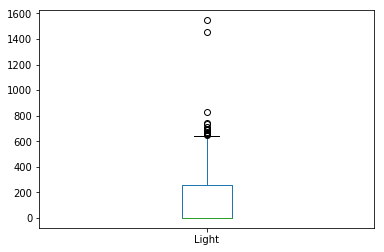

In [57]:
data['Light'].plot.box() 

In [16]:
data[data['Light']>=1000]

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,datetime
3832,2015-02-07 09:42:00,20.700,18.89,1546.333333,455.333333,0.002845,0,2015-02-07 09:42:00
3833,2015-02-07 09:42:59,20.745,18.89,1451.750000,453.000000,0.002853,0,2015-02-07 09:42:59


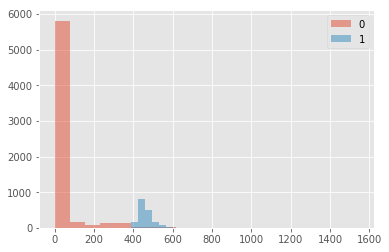

In [9]:
plt.style.use('ggplot')
plt.hist(data['Light'][data['Occupancy']==0], bins=20, alpha=0.5, label='0')
plt.hist(data['Light'][data['Occupancy']==1], bins=20, alpha=0.5, label='1')
plt.legend()

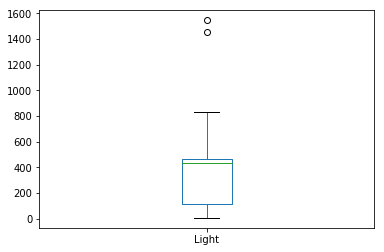

In [60]:
data['Light'][data['Light'] != 0].plot.box() 

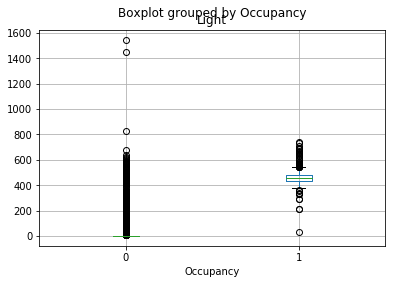

In [61]:
data.boxplot(column='Light', by='Occupancy')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000173E4B165C0>,
      dtype=object)

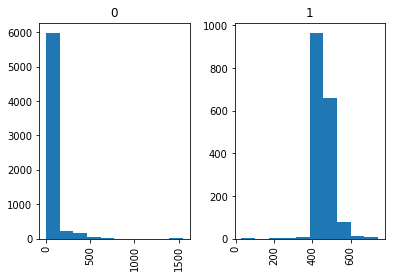

In [63]:
data.hist(column='Light', by='Occupancy')

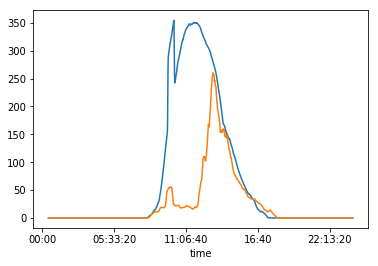

In [69]:
# 주말
trend('Light', 7)
trend('Light', 8)

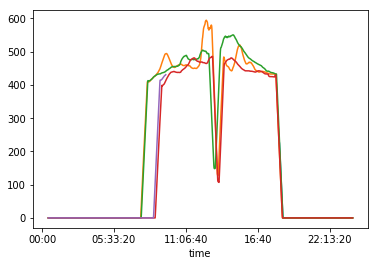

In [70]:
# 주중
trend('Light', 4)
trend('Light', 5)
trend('Light', 6)
trend('Light', 9)
trend('Light', 10)

In [12]:
def graph(feature, day) :
    d = data[data['datetime'].dt.day == day]
    d.index = d['datetime'].dt.time

    plt.plot(d[feature])
    
    return None

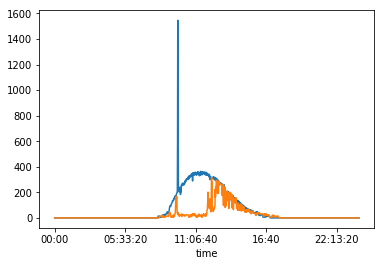

In [67]:
# 주말
graph('Light', 7)
graph('Light', 8)

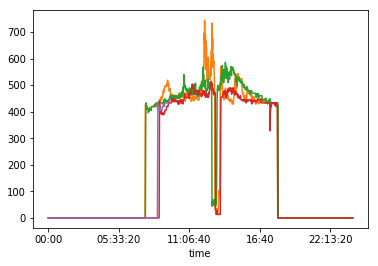

In [68]:
# 주중
graph('Light', 4)
graph('Light', 5)
graph('Light', 6)
graph('Light', 9)
graph('Light', 10)

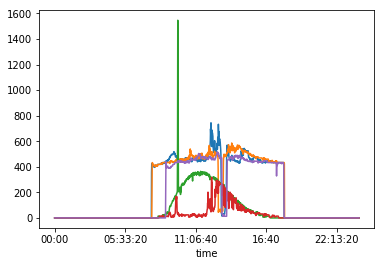

In [13]:

graph('Light', 5)
graph('Light', 6)
graph('Light', 7)
graph('Light', 8)
graph('Light', 9)


* CO2

In [71]:
data['CO2'].describe()

count    8143.000000
mean      606.546243
std       314.320877
min       412.750000
25%       439.000000
50%       453.500000
75%       638.833333
max      2028.500000
Name: CO2, dtype: float64

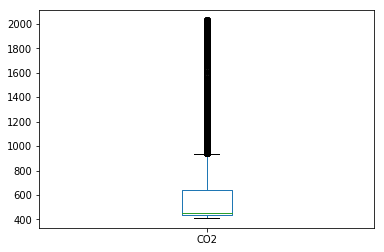

In [72]:
data['CO2'].plot.box()

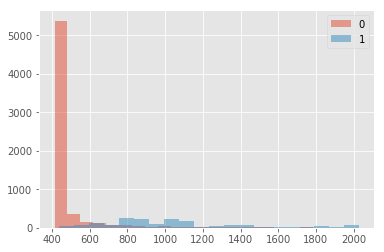

In [10]:
plt.style.use('ggplot')
plt.hist(data['CO2'][data['Occupancy']==0], bins=20, alpha=0.5, label='0')
plt.hist(data['CO2'][data['Occupancy']==1], bins=20, alpha=0.5, label='1')
plt.legend()

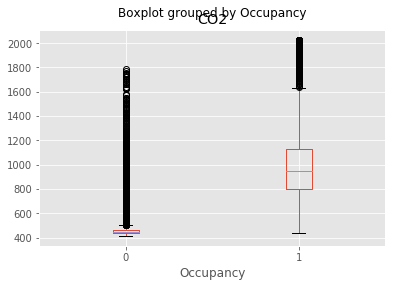

In [11]:
plt.style.use('ggplot')
data.boxplot(column='CO2', by='Occupancy')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000173E5048F98>,
      dtype=object)

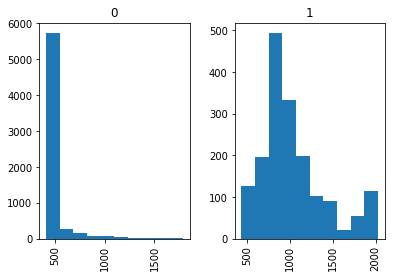

In [75]:
data.hist(column='CO2', by='Occupancy')

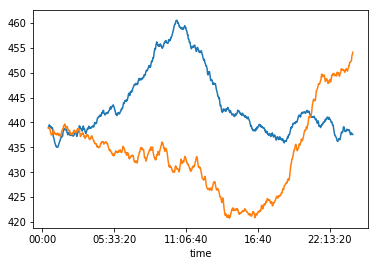

In [76]:
# 주말
trend('CO2', 7)
trend('CO2', 8)

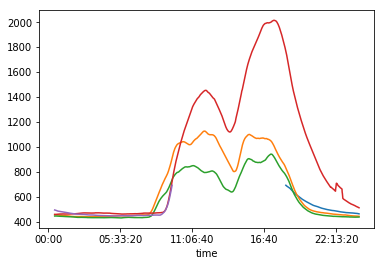

In [77]:
# 주중
trend('CO2', 4)
trend('CO2', 5)
trend('CO2', 6)
trend('CO2', 9)
trend('CO2', 10)

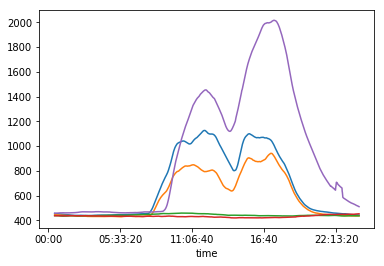

In [14]:

trend('CO2', 5)
trend('CO2', 6)
trend('CO2', 7)
trend('CO2', 8)
trend('CO2', 9)


* HumidityRatio

In [80]:
data['HumidityRatio'].describe()

count    8143.000000
mean        0.003863
std         0.000852
min         0.002674
25%         0.003078
50%         0.003801
75%         0.004352
max         0.006476
Name: HumidityRatio, dtype: float64

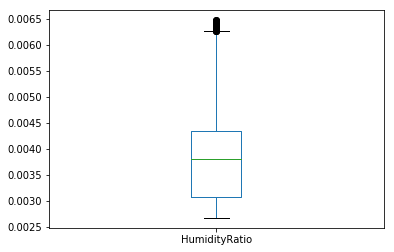

In [81]:
data['HumidityRatio'].plot.box() 

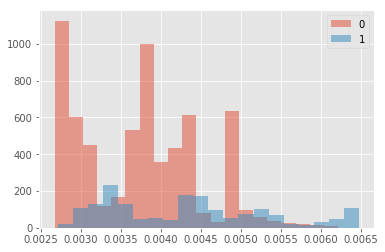

In [14]:
plt.style.use('ggplot')
plt.hist(data['HumidityRatio'][data['Occupancy']==0], bins=20, alpha=0.5, label='0')
plt.hist(data['HumidityRatio'][data['Occupancy']==1], bins=20, alpha=0.5, label='1')
plt.legend()

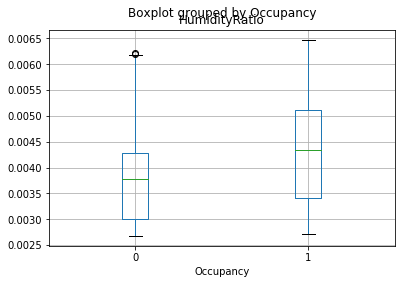

In [83]:
data.boxplot(column='HumidityRatio', by='Occupancy')

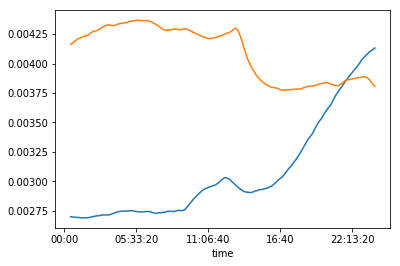

In [85]:
# 주말
trend('HumidityRatio', 7)
trend('HumidityRatio', 8)

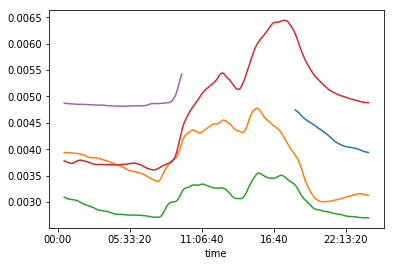

In [86]:
# 주중
trend('HumidityRatio', 4)
trend('HumidityRatio', 5)
trend('HumidityRatio', 6)
trend('HumidityRatio', 9)
trend('HumidityRatio', 10)

* Occupancy

In [132]:
data['Occupancy'].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

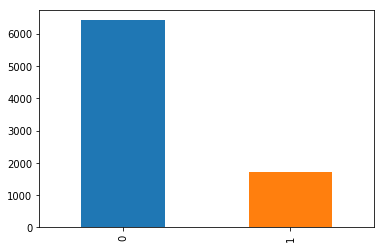

In [133]:
data['Occupancy'].value_counts().plot.bar()

In [ ]:
d = data[data['datetime'].dt.day == 5]
d['time'] = d['datetime'].dt.hour

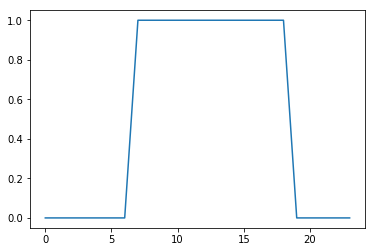

In [135]:
max_occ = d.groupby(by=['time'])['Occupancy'].max()
plt.plot(max_occ)

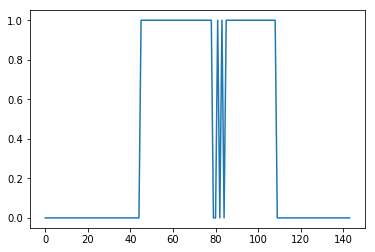

In [136]:
d['min'] = list(map(lambda x : str(x.minute)[0] if x.minute>10 else '0', d['datetime']))

max_occ2 = d.groupby(by=['time', 'min'])['Occupancy'].max()
max_occ2.index = range(0, len(max_occ2))
plt.plot(max_occ2)

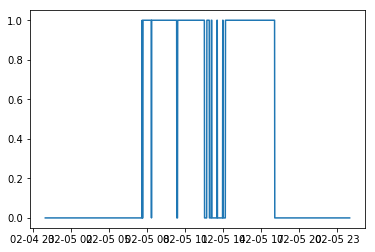

In [137]:
plt.plot(d['datetime'],d['Occupancy'])

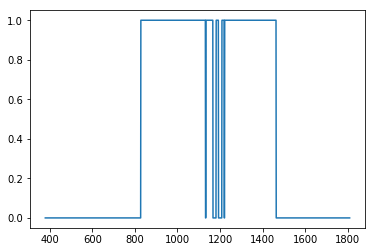

In [44]:
ma = d['Occupancy'].rolling(window=10).max()
ma.plot(kind='line')

* Correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000173E65BBF28>,
      dtype=object)

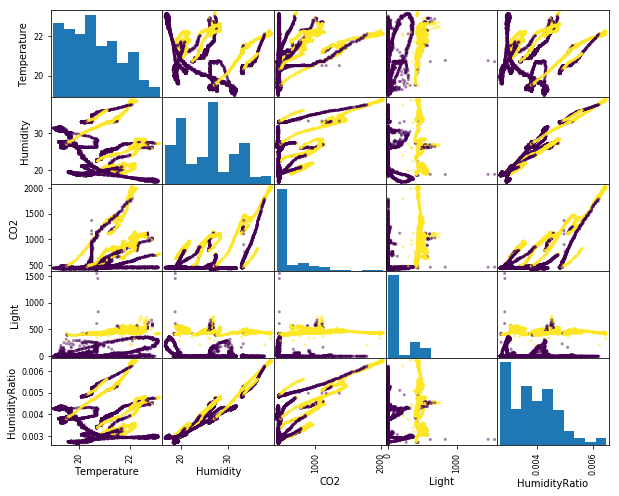

In [90]:
scatter_matrix(data[['Temperature', 'Humidity', 'CO2', 'Light', 'HumidityRatio']], c=data['Occupancy'], figsize=(10,8))

In [92]:
corr = data[['Temperature', 'Humidity', 'CO2', 'Light', 'HumidityRatio']].corr()
corr

,Temperature,Humidity,CO2,Light,HumidityRatio
Temperature,1.000000,-0.141759,0.559894,0.649942,0.151762
Humidity,-0.141759,1.000000,0.439023,0.037828,0.955198
CO2,0.559894,0.439023,1.000000,0.664022,0.626556
Light,0.649942,0.037828,0.664022,1.000000,0.230420
HumidityRatio,0.151762,0.955198,0.626556,0.230420,1.000000
